In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os
import seaborn as sns


In [ ]:
rsna = pd.read_csv("dataframe.csv")
shenzen = pd.read_csv("dataframe2.csv")
labels = pd.read_csv("stage_2_train_labels.csv")
rsna = pd.merge(rsna, labels, left_on="ID", right_on="patientId")
del labels
rsna.drop(["Phot_int", "patientId"], axis=1, inplace=True)
rsna = rsna.drop_duplicates(subset="ID")
rsna.drop(rsna[rsna['Age'] > 100].index, inplace=True)
shenzen.loc[shenzen["gender"] == "femal", "gender"] = "female"

In [ ]:
cxr2_train = pd.read_csv("train.txt", sep=" ", header = None)
cxr2_test = pd.read_csv("test.txt", sep=" ", header = None)
cxr2_train.columns = ["patient id", "filename", "class", "data source"]
cxr2_test.columns = ["patient id", "filename", "class", "data source"]

In [ ]:
#Skrypty i funkcje pomocnicze

def get_numof_files(path):
    return len(os.listdir(path))
def get_patients_with_diff_ets(df, cls = 'class', ids = 'patient id'): #raczej mało ogólnostosowalna
    repeated_patients = df[ids].value_counts()[np.where(df[ids].value_counts()>1)[0]].index
    patients = []
    for i in repeated_patients:
        if len(df[df[ids] == i][cls].value_counts()) >1:
            patients.append(i)
    return patients
def get_unique_sizes(path, title):
    imgs = os.listdir(path)
    widths = []
    heights = []
    for file in imgs:
        im = Image.open(path + file)
        w,h, *_ = np.array(im).shape
        widths.append(w)
        heights.append(h)
    plt.scatter(widths, heights)
    plt.title(title)
    
def get_file_extensions(path):
    files = os.listdir(path)
    extensions = []
    for file in files:
        _, ext = os.path.splitext(file)
        extensions.append(ext)
    return extensions
def count_unique(l):
    for i in np.unique(l):
        print(i, l.count(i))
                   
                   

# Informacje podstawowe

### 1. Rodzaj bazy danych

**covidx-cxr2** - baza obrazowa + metadane   
**QaTa-COV19 Dataset** - baza obrazowa  
**Shenzen Chest Xray Dataset** - baza obrazowa + metadane  
**rsna-pneumonia-detection-challenge** - baza obrazowa + metadane  
**LIDC-IDRI** - baza obrazowa + metadane  
**SIIM-ACR Pneumothorax Segmentation** - baza obrazowa + metadane

### 2. Jakie zadania można wykonać na tych danych

**covidx-cxr2** - klasyfikacja binarna   
**QaTa-COV19 Dataset** - segmentacja, klasyfikacja binarna (nazwy plików to etykiety)  
**Shenzen Chest Xray Dataset** - klasyfikacja binarna  
**rsna-pneumonia-detection-challenge** - detekcja  
**LIDC-IDRI** - klasyfikacja wieloklasowa  
**SIIM-ACR Pneumothorax Segmentation** - segmentacja

### 3. Licencja. czy jest przy danych, jaka?

**covidx-cxr2** - zbiór został stworzony z podzbiorów o różnych licencjach, m.in. Apache 2.0, Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0), Attribution 4.0 International (CC BY 4.0), GNU General Public License (GPLv3), Terms of Use and Attribution.   
**QaTa-COV19 Dataset** - brak informacji o licencji.  
**Shenzen Chest Xray Dataset** - brak informacji   
**rsna-pneumonia-detection-challenge** - zbiór stworzony pod konkurs Kaggle, “Unless otherwise restricted under the Competition Specific Rules above, after your acceptance of these Rules, you may access and use the Competition Data for the purposes of the Competition, participation on Kaggle Website forums, academic research and education, and other commercial or non-commercial purposes as long as you provide attribution for the dataset and the individual items (sound files) when required. The Competition Website provides more details regarding proper attribution of the Competition Data and its contents.”  
**LIDC-IDRI** - wypuszczony pod licencją Creative Commons Attribution 3.0 Unported License, użytkownicy bazy muszą przestrzegać zasad zdefiniowanych w TCIA Data Usage Policy.  
**SIIM ACR Pneumothorax Segmentation** - wydane pod The MIT License (MIT)

### 4. Rodzaje annotacji - maski / etykiety

**covidx-cxr2** - etykiety  
**QaTa-COV19 Dataset** - maski lub etykiety  
**Shenzen Chest Xray Dataset** - etykiety  
**rsna-pneumonia-detection-challenge** - bounding boxes  
**LIDC-IDRI** - etykiety  
**SIIM ACR Pneumothorax Segmentation** - maski i etykiety

### 5. Etykiety to choroby, czy zmiany chorobowe?

**covidx-cxr2** - etykieta wyznacza, czy pacjent jest chory na COVID ("positive"), lub zdrowy ("negative").  
**QaTa-COV19 Dataset** - maski wyznaczają zmiany chorobowe u pacjentów chorych na COVID. na zbiorze można jednak przeprowadzić też klasyfikację binarną, za etykiety mogą posłużyć nazwy plików.  
**Shenzen Chest Xray Dataset** - etykieta wyznacza, czy występują objawy gruźlicy    
**rsna-pneumonia-detection-challenge** - bounding boxes zaznaczają zmętnienia płuc jako dowody zapalenia płuc  
**LIDC-IDRI** - 3 etykiety oznaczające wielkość guza płucnego, odpowiednio "nodule > or =3 mm," "nodule <3 mm," and "non-nodule > or =3 mm"  
**SIIM ACR Pneumothorax Segmentation** - maski nakładające się na odmę opłucowną, może być również wykoane do klasyfikacji, tam gdzie maska nie została nałożona (są takie przypadki).

### 6. Czy zdjęcia 2d/3d

**covidx-cxr2** - zdjęcia 2d (png/jpg).    
**QaTa-COV19 Dataset** - zdjęcia 2d (png).  
**Shenzen Chest Xray Dataset** - zdjecia 2d (png)  
**rsna-pneumonia-detection-challenge** - zdjecia 2d (DICOM)  
**LIDC-IDRI** - zdjęcia 3d (DICOM)  
**SIIM-ACR Pneumothorax Segmentation** - zdjęcia 2d (DICOM)

# Dane ilościowe

### 1. Liczba zdjęć w bazie danych 

**covidx-cxr2** - 30882 zdjęć, z czego 400 w zbiorze testowym.   
**QaTa-COV19 Dataset** - 12209 zdjęć z maskami oraz 1652 zdjęcia bez masek.  
**Shenzen Chest Xray Dataset** - 662 zdjęć  
**rsna-pneumonia-detection-challenge** - 26 684 zdjęć w zbiorze treningowym, 3000 w testowym  
**Baza LIDC-IDRI** - 1873, pokazane w pracy domowej I  
**SIIM ACR Pneumothorax Segmentation** - 12090, pokazane w pracy domowej I (są to zdjęcia w ogólności, być może samego pacjenta)

In [ ]:
print("Liczba zdjęć z maskami w QaTa-COV19 Dataset:", get_numof_files('D:\WB2DANE\QaTa-COV19\QaTa-COV19-v2\Train Set\Images') + get_numof_files('D:\WB2DANE\QaTa-COV19\QaTa-COV19-v2\Test Set\Images'))
print("Liczba zdjęć bez masek w QaTa-COV19 Dataset:", get_numof_files('D:\WB2DANE\QaTa-COV19\QaTa-COV19-v1\Images'))

print("Liczba zdjęć w covidx-cxr2:", get_numof_files(r"D:\WB2DANE\test") + get_numof_files(r"D:\WB2DANE\train"))



Liczba zdjęć z maskami w QaTa-COV19 Dataset: 12209
Liczba zdjęć bez masek w QaTa-COV19 Dataset: 1652
Liczba zdjęć w covidx-cxr2: 30882


### 2. Liczba unikatowych pacjentów

**covidx-cxr2** - 16648 w zbiorze treningowym i 378 w zbiorze testowym.   
**QaTa-COV19 Dataset** - brak danych.  
**Shenzen Chest Xray Dataset** - brak informacji  
**rsna-pneumonia-detection-challenge** - brak informacji  
**LIDC-IDRI** - metadane stwierdzają o wyłącznie 1 pacjencie (co zostało prawdopodobnie "leniwie" wypełnione), choć struktura folderów mówi o 10 unikalnych. Ostatecznie nierozstrzygnięte.  
**SIIM ACR Pneumothorax Segmentation** - brak danych, metadane również wspominają o wyłącznie 1 pacjencie.

In [ ]:
print("Liczba unikalnych pacjentów w zbiorze treningowym w covidx-cxr2:", len(np.unique(cxr2_train['patient id'])))
print("Liczba unikalnych pacjentów w zbiorze testowym w covidx-cxr2:", len(np.unique(cxr2_test['patient id'])))


Liczba unikalnych pacjentów w zbiorze treningowym w covidx-cxr2: 16648
Liczba unikalnych pacjentów w zbiorze testowym w covidx-cxr2: 378


### 3. Czy zdjęcia są z CT, czy z RTG? 




**covidx-cxr2** - zdjęcia z RTG.   
**QaTa-COV19 Dataset** - zdjęcia z RTG.  
**Shenzen Chest Xray Dataset** - RTG.  
**rsna-pneumonia-detection-challenge** - RTG.  
**LIDC-IDRI** - CT.  
**SIIM ACR Pneumothorax Segmentation** - RTG.

### 4. Projekcje zdjęć RTG - ile, których

**covidx-cxr2** - brak informacji.   
**QaTa-COV19 Dataset** - brak informacji.  
**Shenzen Chest Xray Dataset** - 662 (wszystkie) PA  
**rsna-pneumonia-detection-challenge** - 15297 AP, 14925 PA  
**LIDC-IDRI** - brak informacji.  
**SIIM ACR Pneumothorax Segmentation** - brak informacji.

### 5. Czy wszystkie zdjęcia mają maski? Jeśli nie, to ile brakuje?

**covidx-cxr2** - wszystkie zdjęcia mają etykiety.   
**QaTa-COV19 Dataset** - 1652 zdjęcia nie mają masek.  
**Shenzen Chest Xray Dataset** - wszystkie mają etykiety  
**rsna-pneumonia-detection-challenge** - brak bounding boxów oznacza pacjenta bez zmian  
**LIDC-IDRI** - wszystkie etykiety są podane  
**SIIM ACR Pneumothorax Segmentation** - ciężko stwierdzić, czy każde dane mają maskę, brak o tym jednoznacznej informacji. Maska nie zawierająca informacji o oznaczonych pixelach oznacza brak stwierdzonej odmy.

In [ ]:
pics = get_numof_files('D:\WB2DANE\QaTa-COV19\QaTa-COV19-v2\Train Set\Images') + get_numof_files('D:\WB2DANE\QaTa-COV19\QaTa-COV19-v2\Test Set\Images') + get_numof_files('D:\WB2DANE\QaTa-COV19\QaTa-COV19-v1\Images')
masks = get_numof_files('D:\WB2DANE\QaTa-COV19\QaTa-COV19-v2\Train Set\Ground-truths') + get_numof_files('D:\WB2DANE\QaTa-COV19\QaTa-COV19-v2\Test Set\Ground-truths')
print("Liczba zdjęć w QaTa-COV19 Dataset: ", pics)
print("Liczba masek w QaTa-COV19 Dataset: ", masks)
print("Różnica: ", pics-masks)


Liczba zdjęć w QaTa-COV19 Dataset:  13861
Liczba masek w QaTa-COV19 Dataset:  12209
Różnica:  1652


### 6. Czy są zdjęcia tego samego pacjenta, gdy był chory a zdrowy? ile?

**covidx-cxr2** - tak, pacjenci ci znajdują się w zbiorze treningowym, zostali wypisani poniżej.   
**QaTa-COV19 Dataset** - brak informacji.  
**Shenzen Chest Xray Dataset** - brak informacji, ale najprawdopodobniej nie, ponieważ zdjęcia są z przestrzeni ok. miesiąca  
**rsna-pneumonia-detection-challenge** - brak informacji.  
**LIDC-IDRI** - zdjęcia są robione dla osobnych pacjentów, brak jest danych o datach poszczególnych wykonań, jednakże etykieta przypisana jest całej serii zdjęć więc dany pacjent ma 1 label.  
**SIIM ACR Pneumothorax Segmentation** - ponieważ brak jest id pacjenta, nie da się stwierdzić, jakiego pacjenta dotyczą dane.


In [ ]:
pts_cxr2_train = get_patients_with_diff_ets(df = cxr2_train)
pts_cxr2_test = get_patients_with_diff_ets(df = cxr2_test)
print("Pacjenci ze zdjęciami z oboma etykietami ze zbioru treningowego covidx-cxr2:",pts_cxr2_train)
print("Pacjenci ze zdjęciami z oboma etykietami ze zbioru testowego covidx-cxr2:",pts_cxr2_test)
print("Liczba takich zdjęć w zbiorze treningowym:")
cxr2_train[cxr2_train['patient id'].isin(pts_cxr2_train)]['class'].value_counts()

Pacjenci ze zdjęciami z oboma etykietami ze zbioru treningowego covidx-cxr2: ['318', '173', 'ANON60', '316', '315', 'ANON96', 'ANON58', '313b', '325', '351']
Pacjenci ze zdjęciami z oboma etykietami ze zbioru testowego covidx-cxr2: []
Liczba takich zdjęć w zbiorze treningowym:


positive    18
negative    12
Name: class, dtype: int64

### 7. Liczba atrybutów z pilku np. DICOM

**covidx-cxr2** - nie dotyczy.  
**QaTa-COV19 Dataset** - nie dotyczy.  
**Shenzen Chest Xray Dataset** - 3, w pliku .txt i nazwie zdjęcia  
**rsna-pneumonia-detection-challenge** - 10, z DICOM i .csv  
**LIDC-IDRI** - 171 z DICOM oraz 18 z .csv, jednakże niektóre zeń się pokrywają  
**SIIM ACR Pneumothorax Segmentation** - 120 z DICOM oraz 1 z .csv (tym atrybutem są mianowicie maski, wypisane jako ciąg pikseli)

# Informacje o danych

### 1. Liczba i rozkład rozszerzeń zdjęć

**covidx-cxr2** - .jpg - 14566 plików, .png - 16316 plików.   
**QaTa-COV19 Dataset** - wszystkie pliki (13861) mają roszerzenie .png  
**Shenzen Chest Xray Dataset** - wsyzstkie .png  
**rsna-pneumonia-detection-challenge** - wszystkie DICOM 
**LIDC-IDRI** - wszystkie DICOM, jest ich 1873  
**SIIM ACR Pneumothorax Segmentation** - wszystkie w formacie DICOM, jest ich 10713 w zbiorze treningowym, 1377 w zbiorze testowym.

In [ ]:
ext_cxr2 = get_file_extensions(r"D:\WB2DANE\train") + get_file_extensions(r"D:\WB2DANE\test")
ext_qata = get_file_extensions('D:\WB2DANE\QaTa-COV19\QaTa-COV19-v2\Train Set\Images') + get_file_extensions('D:\WB2DANE\QaTa-COV19\QaTa-COV19-v2\Test Set\Images') + get_file_extensions('D:\WB2DANE\QaTa-COV19\QaTa-COV19-v1\Images') 
ext_cxr2 = [str.lower(i) for i in ext_cxr2]
ext_cxr2 = ['.jpg' if i == ".jpeg" else i for i in ext_cxr2]
plt.figure(figsize=(20,7))
plt.subplot(1,2, 1)
plt.hist(ext_cxr2)
plt.title("Rozszerzenia dla covidx-cxr2")
plt.subplot(1,2,2)
plt.hist(ext_qata)
plt.title("Rozszerzenia dla QaTa-COV19 Dataset")
plt.show()

print("Unikalne rozszerzenia dla covidx-cxr2")
count_unique(ext_cxr2)
print("Unikalne rozszerzenia dla QaTa-COV19 Dataset")
count_unique(ext_qata)

FileNotFoundError: ignored

### 2. Czy jest info o sprzęcie, na którym wykonano badania? Jaki to sprzęt?

**covidx-cxr2** - rentgen, brak dokładniejszych informacji o sprzęcie.   
**QaTa-COV19 Dataset** - rentgen, brak dokładniejszych informacji o sprzęcie.  
**Shenzen Chest Xray Dataset** - Philips DR Digital Diagnost system  
**rsna-pneumonia-detection-challenge** - brak  
**LIDC-IDRI** - są w atrybucie DICOM'u "ManufacturerModelName", wszystkie wykonane na LightSpeed VCT.  
**SIIM ACR Pneumothorax Segmentation** - brak  


### 3. W jakim formacie są annotacje?

**covidx-cxr2** - kolumna w pliku .txt   
**QaTa-COV19 Dataset** - pliki .png  
**Shenzen Chest Xray Dataset** - 0 lub 1 na końcu nazwy pliku lub komentarz w pliku .txt  
**rsna-pneumonia-detection-challenge** - koordynaty bounding boxów w .csv  
**LIDC-IDRI** - liczba w pliku .csv oznaczająca label  
**SIIM ACR Pneumothorax Segmentation** - koordynaty pixeli rzekomej odmy opłucnej w pliku .csv  

### 4. W jakich płaszczyznach mamy zdjęcia?

**covidx-cxr2** - zdjęcia od przodu/tyłu klatki piersiowej (brak dokładniejszych informacji).   
**QaTa-COV19 Dataset** - zdjęcia od przodu/tyłu klatki piersiowej (brak dokładniejszych informacji).  
**LIDC-IDRI** - brak precyzyjnyjnych infromacji (należałoby ręcznie sprawdzić), lecz aparatura wykonuje zdjęcia klatki piersiowej w przekroju (jako CT). Kąt pomiaru może być różny i przyjmuje wiele wartości, choć przeważnie są równoległe z poziomem.  
**SIIM ACR Pneumothorax Segmentation** - istnieje atrybut świadczący o tym, jednakże cały jest pusty. Zdjęcia należałoby sprawdzić ręcznie, choć są wykonane z przodu i tyłu klatki piersiowej.  

### 5. Jakie są nazwy klas?

**covidx-cxr2** - "positive"- pacjent chory, "negative"- pacjent zdrowy.   
**QaTa-COV19 Dataset** - maski jako nazwy plików- pacjenci zdrowi mają pliki w formacie "normal_[number]", a chorzy- "covid_[number]".  
**Shenzen Chest Xray Dataset** - normal/PTB  
**rsna-pneumonia-detection-challenge** - Target 0 (normalne płuca) / 1 (nienormalne)  
**LIDC-IDRI** - klasy oznaczone, i autodeskryptywne, następująco: "nodule > or =3 mm," "nodule <3 mm," and "non-nodule > or =3 mm"  
**SIIM ACR Pneumothorax Segmentation** - są to maski, tam gdzie brak zaznaczenia jest wartość "-1".

In [ ]:
#sprawdzenie klas dla covidx-cxr2:
print("Unikalne klasy dla zbioru treningowego:", cxr2_train['class'].unique())
print("Unikalne klasy dla zbioru testowego:", cxr2_test['class'].unique())

NameError: ignored

### 6. Czy kontrast jest obecny?

**covidx-cxr2** - brak informacji.  
**QaTa-COV19 Dataset** - brak informacji.  
**Shenzen Chest Xray Dataset** - brak informacji    
**rsna-pneumonia-detection-challenge** - brak informacji.  
**LIDC-IDRI** - brak informacji.  
**SIIM ACR Pneumothorax Segmentation** - brak informacji. 

### 7. Czy wiadomo w jakich latach wykonywano zdjęcia?

**covidx-cxr2** - brak informacji o latach wykonywania zdjęć, biorąc jednak pod uwagę specyfikę zbioru (dotyczy COVID-19), oraz datę jego wydania można zakładać, że są to lata 2019-2021.   
**QaTa-COV19 Dataset** - jak wyżej, prawdopodobnie są to lata 2019-2021.  
**Shenzen Chest Xray Dataset** - głównie wrzesień 2012  
**rsna-pneumonia-detection-challenge** - brak informacji  
**LIDC-IDRI** - informacje o dacie w plikach DICOM zostały wyzerowane, jednakże informacja na stronie danych, sugeruje, że wykonano je przed rokiem 2012.  
**SIIM ACR Pneumothorax Segmentation** - wszystkie dane o dacie zostały wyzerowane

### 8. "Slice Thickness", jeśli w CT

**covidx-cxr2** - nie dotyczy.  
**QaTa-COV19 Dataset** - nie dotyczy.  
**Shenzen Chest Xray Dataset** - nie dotyczy  
**rsna-pneumonia-detection-challenge** - nie dotyczy  
**LIDC-IDRI** - wartości 2.5mm, 1.25mm oraz niewielkie braki. Uwcześnie wymienione wartości w proporcjach procentowych odpowiednio około: 55%, 44% oraz 1%.  
**SIIM ACR Pneumothorax Segmentation** - nie dotyczy

### 9. Wysokości i szerokości zdjęć, czy są kwadratowe?

**covidx-cxr2** - wykresy poniżej.   
**QaTa-COV19 Dataset** - wykresy poniżej.  
**rsna-pneumonia-detection-challenge** - wszystkie 1028x1028  

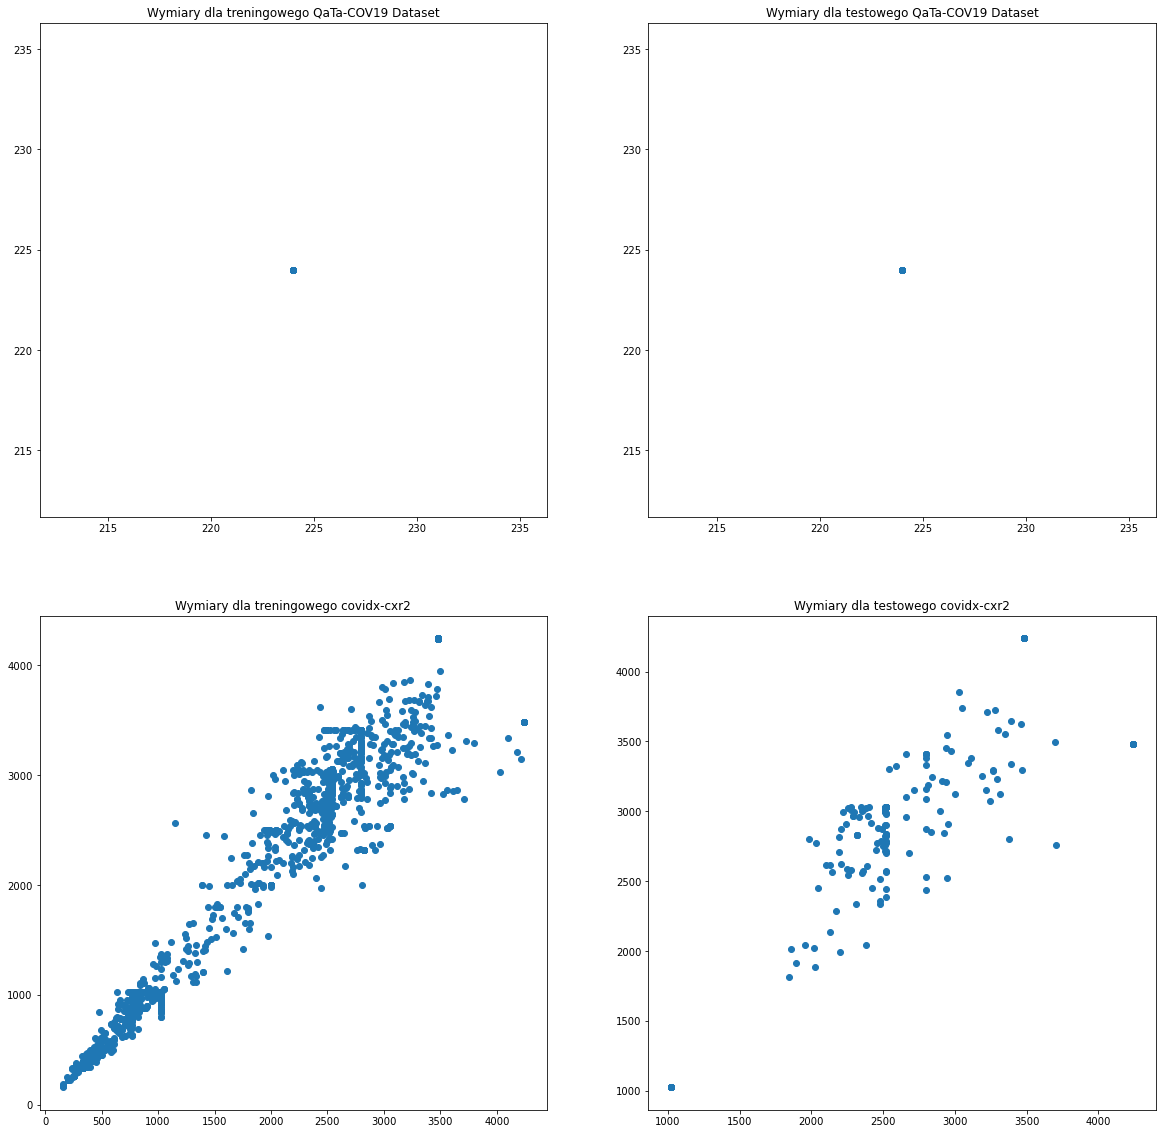

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
get_unique_sizes('D:\WB2DANE\QaTa-COV19\QaTa-COV19-v2\Train Set\Images\\', title = "Wymiary dla treningowego QaTa-COV19 Dataset")
plt.subplot(2,2,2)
get_unique_sizes('D:\WB2DANE\QaTa-COV19\QaTa-COV19-v2\Test Set\Images\\', title = "Wymiary dla testowego QaTa-COV19 Dataset")
plt.subplot(2,2,3)
get_unique_sizes(r"D:\WB2DANE\train\\", title = "Wymiary dla treningowego covidx-cxr2")
plt.subplot(2,2,4)
get_unique_sizes(r"D:\WB2DANE\test\\", title = "Wymiary dla testowego covidx-cxr2")


**Shenzen Chest Xray Dataset**

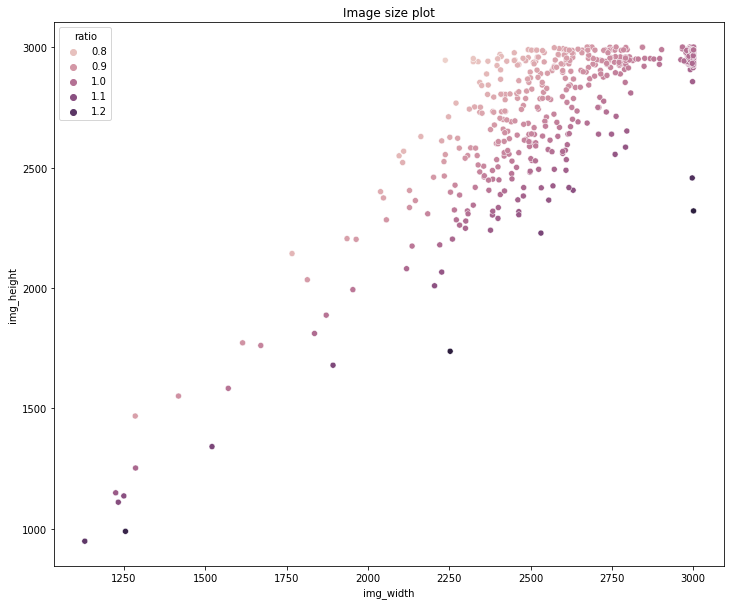

In [ ]:
plt.figure(figsize = (12,10))
shenzen["ratio"] = shenzen["img_width"] / shenzen["img_height"]

sns.scatterplot(data=shenzen, x="img_width", y="img_height", hue="ratio")
plt.title("Image size plot")
plt.show()

**LIDC-IDRI**

 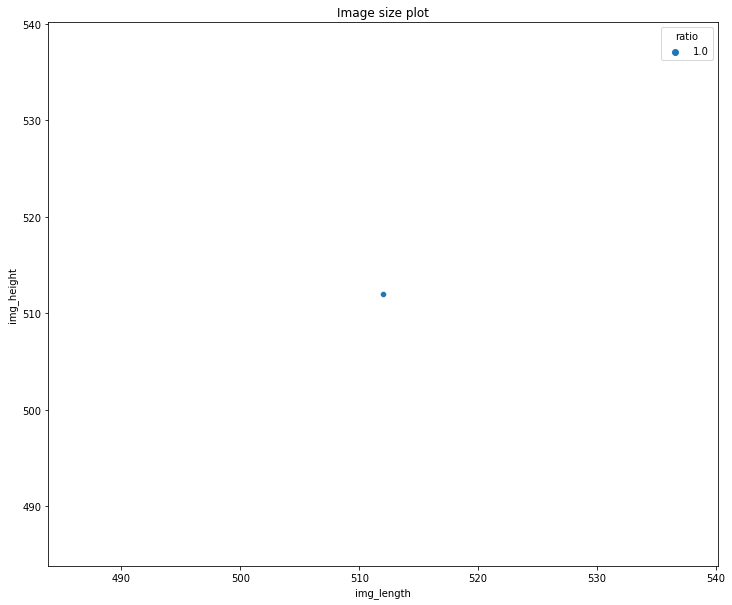

**SIIM ACR Pneumothorax Segmentation**

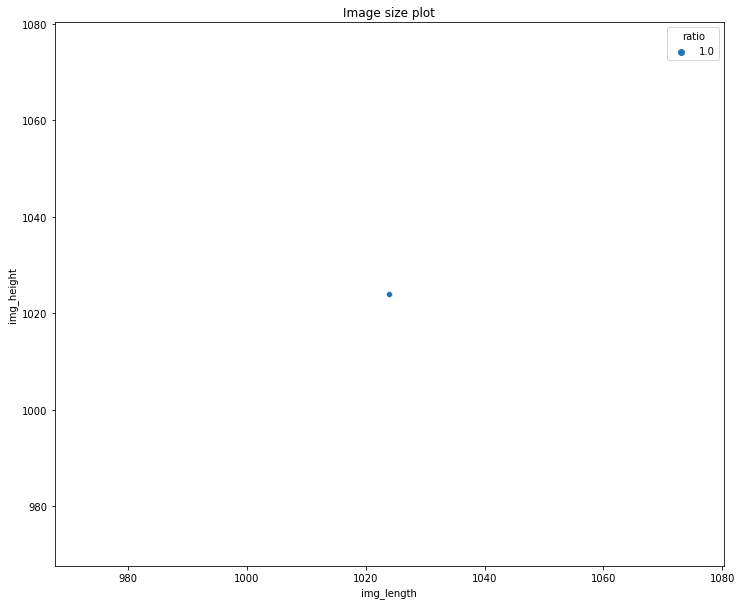

### 10. SpatialResolution_DICOM

**covidx-cxr2** - nie dotyczy.  
**QaTa-COV19 Dataset** - nie dotyczy.  
**Shenzen Chest Xray Dataset** - brak informacji   
**rsna-pneumonia-detection-challenge** - brak informacji  
**LIDC-IDRI** - brak informacji  
**SIIM ACR Pneumothorax Segmentation** - brak informacji 

### 11. Czy istnieje podział na zbiór treningowy i testowy?


**covidx-cxr2** - podział zapewniony przez twórców (jednak jego jakość jest wątpliwa, prawdopodobnie będzie trzeba wprowadzić nowy podział).   
**QaTa-COV19 Dataset** - podział zapewniony przez twórców.  
**Shenzen Chest Xray Dataset** - brak podziału  
**rsna-pneumonia-detection-challenge** - istnieje podział, ale weryfikacja na zbiorze testowym polega zgłoszeniu wyników w konkursie  
**LIDC-IDRI** - brak podziału, zbiór oryginalnie nie został stworzony do tego typu zdań.  
**SIIM ACR Pneumothorax Segmentation** - podział na zbiory jest zapewniony.  

### 12. Czy jest info o kraju pochodzenia zdjęć?




**covidx-cxr2** - zbiór powstał z połączenia różnych podzbiorów, jak podają twórcy- zdjęcia pochodzą z 51 różnych krajów.   
**QaTa-COV19 Dataset** - zbiór został stworzony przez naukowców z uniwersytetu w Katarze,  nie ma jednak dokładnych informacji, skąd pochodzą zdjęcia.  
**Shenzen Chest Xray Dataset** - Shenzhen No.3 Hospital in Shenzhen, Guangdong providence, China  
**rsna-pneumonia-detection-challenge** - brak informacji, ale przy projekcie współpracowali lekarze ze 146 państw.  
**LIDC-IDRI** - państwa pochodzenia nie podane, lecz informacje o organizacjach wchodzących w skład ich produkcji: National Cancer Institute (USA), Foundation for the National Institutes of Health (USA) oraz Food and Drug Administration (USA). Same pochodzenie zdjęć pozostaje bez infromacji, ale z dużym prawdopodobieństwem jest to USA.  
**SIIM ACR Pneumothorax Segmentation** - zdjęcia zostały pobrane z Public Google Cloud Healthcare API, lecz informacje o kraju pochodzenia nie zachowane. W skład może wchodzić wiele państw.


# Balans danych


### 1. Balans klas w zbiorze treningowym a testowym

**covidx-cxr2** - wykresy poniżej.   
**QaTa-COV19 Dataset** - nie dotyczy.  
**Shenzen Chest Xray Dataset** - 326 zdrowych, 336 chorych  
**rsna-pneumonia-detection-challenge** - 20 667 zdrowych, 6 012 chorych  
**LIDC-IDRI** - wykres poniżej  
**SIIM ACR Pneumothorax Segmentation** - nie dotyczy.

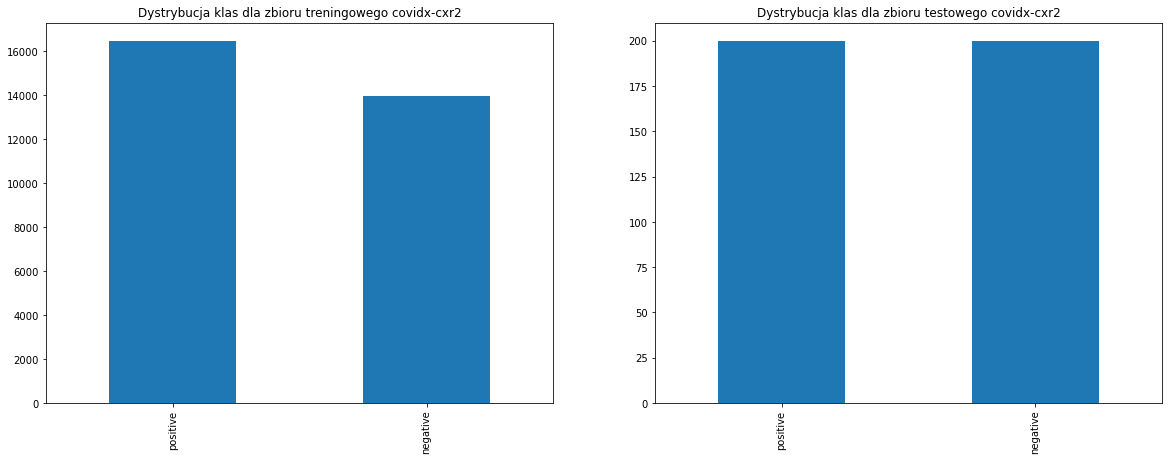

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1,2, 1)
cxr2_train['class'].value_counts().plot(kind='bar', title='Dystrybucja klas dla zbioru treningowego covidx-cxr2')
plt.subplot(1,2, 2)
cxr2_test['class'].value_counts().plot(kind='bar', title='Dystrybucja klas dla zbioru testowego covidx-cxr2')
plt.show()

**LIDC-IDRI**

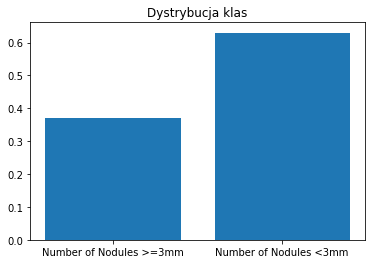

### 2. Rozkład wieku pacjentów 

**covidx-cxr2** - nie dotyczy.  
**QaTa-COV19 Dataset** - nie dotyczy.  
**LIDC-IDRI** - brak informacji o wieku.  
**SIIM ACR Pneumothorax Segmentation** - wykres poniżej.

**Shenzen Xray Chest Dataset**

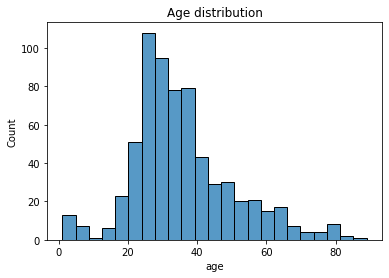

In [ ]:
sns.histplot(data=shenzen['age'])
plt.title("Age distribution")
plt.show()

**rsna-pneumonia-detection-challenge**  
Wykres jest po usunięciu 5 błędnych obserwacji (wiek ok. 150 lat)

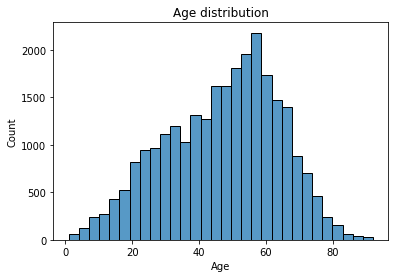

In [ ]:
sns.histplot(data=rsna['Age'], bins=30)
plt.title("Age distribution")
plt.show()

**SIIM ACR Pneumothorax Segmentation**

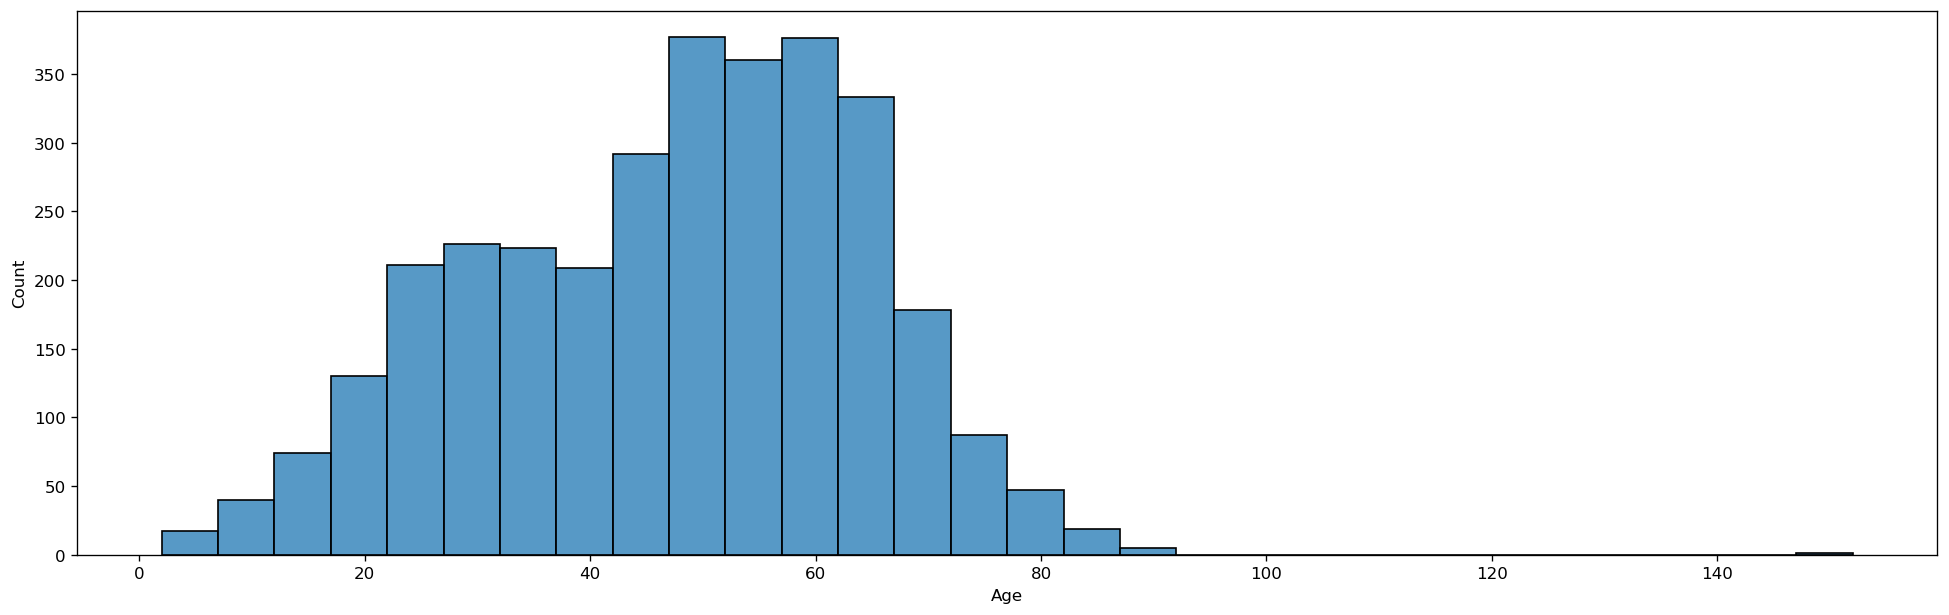

### 3. Balans w płci

**covidx-cxr2** - nie dotyczy.  
**QaTa-COV19 Dataset** - nie dotyczy.  
**Shenzen Xray Chest Dataset** - 213 kobiet, 449 mężczyzn  
**rsna-pneumonia-detection-challenge** - 13009 kobiet, 17213 mężczyzn  
**LIDC-IDRI** - brak danych.  
**SIIM ACR Pneumothorax Segmentation** - 1452 kobiet, 1753 mężczyzn

### 4. Rozkład płci i wieku

**covidx-cxr2** - nie dotyczy.  
**QaTa-COV19 Dataset** - nie dotyczy.  
**LIDC-IDRI** - brak danych.
**SIIM ACR Pneumothorax Segmentation** - poniżej na wykresie.

**Shenzen Chest Xray Dataset**

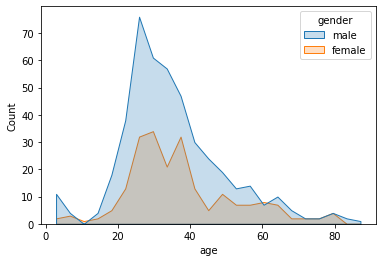

In [ ]:
sns.histplot(data=shenzen, x="age", hue="gender", element="poly")
plt.show()

**rsna-pneumonia-detection-challenge**

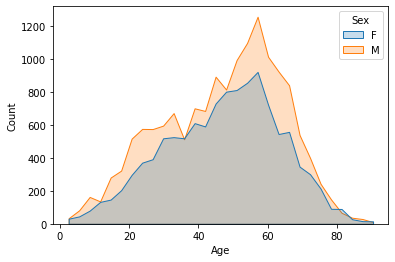

In [ ]:
sns.histplot(data=rsna, x="Age", hue="Sex", element="poly", bins=30)
plt.show()

**LIDC-IDRI**

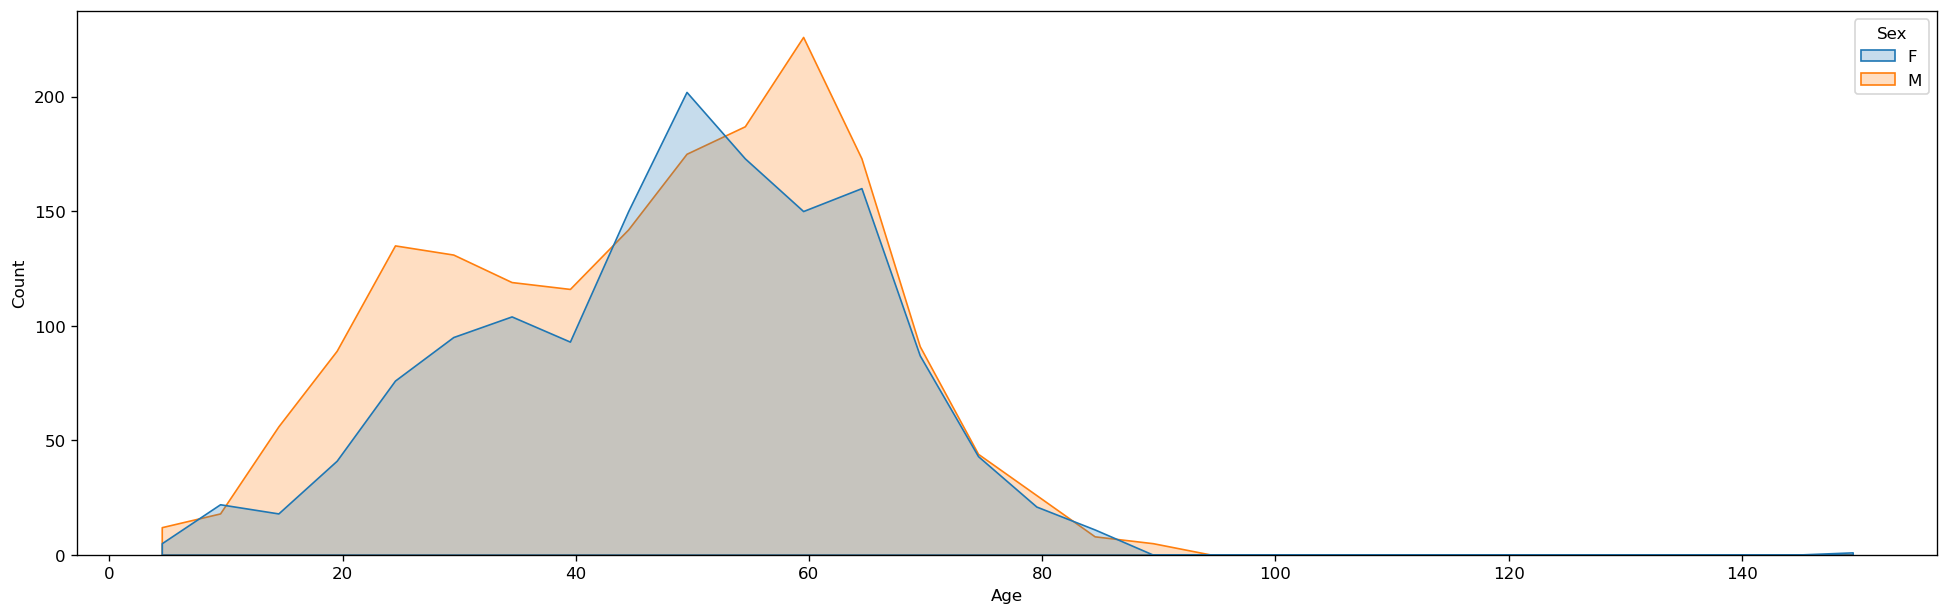

### 5. Rozkład wieku i zdrowości/chorób

**covidx-cxr2** - nie dotyczy.  
**QaTa-COV19 Dataset** - nie dotyczy.  
**LIDC-IDRI** - nie dotyczy.  
**SIIM ACR Pneumothorax Segmentation** - nie dotyczy.

**Shenzen Chest Xray Dataset**  
H - Healthy, NH - Not Healthy

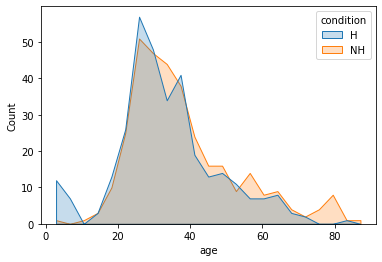

In [ ]:
sns.histplot(data=shenzen, x="age", hue="condition", element="poly")
plt.show()

**rsna-pneumonia-detection-challenge** 


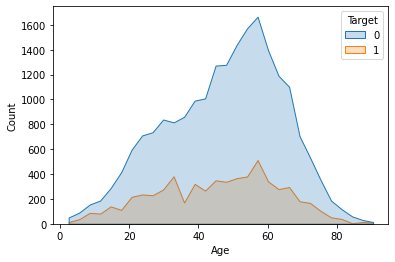

In [ ]:
sns.histplot(data=rsna, x="Age", hue="Target", element="poly", bins=30)
plt.show()

### 6. Balans innych danych w zbiorach

**covidx-cxr2** - wykresy poniżej.   
**QaTa-COV19 Dataset** - nie dotyczy.  
**SIIM ACR Pneumothorax Segmentation** - nie dotyczy.  
**LIDC-IDRI** - nie dotyczy.

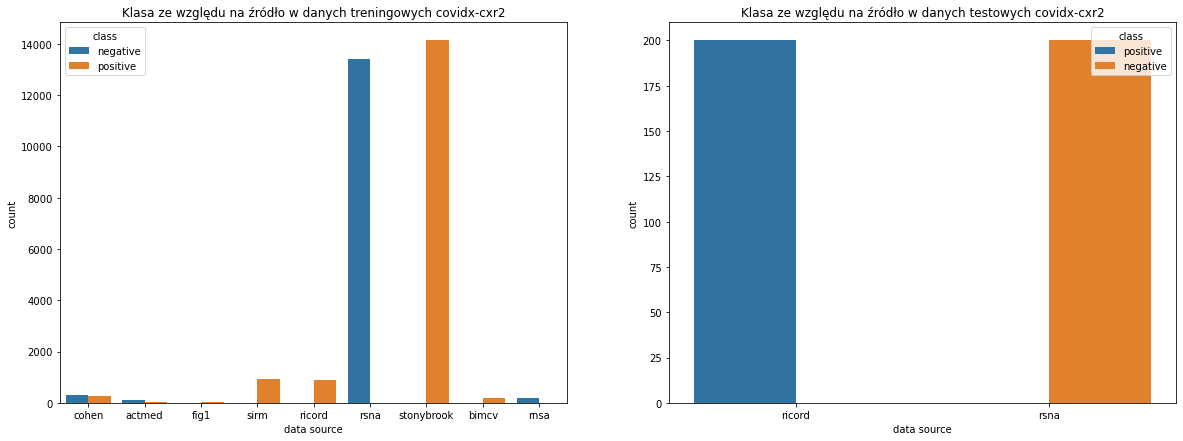

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1,2, 1)
sns.countplot(data = cxr2_train, x = "data source", hue = "class").set(title = "Klasa ze względu na źródło w danych treningowych covidx-cxr2")
plt.subplot(1,2, 2)
sns.countplot(data = cxr2_test, x = "data source", hue = "class").set(title = "Klasa ze względu na źródło w danych testowych covidx-cxr2")
plt.show()

**rsna-pneumonia-detection-challenge**

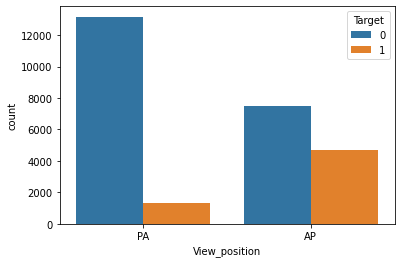

In [ ]:
sns.countplot(data=rsna, x="View_position", hue="Target")
plt.show()

# Analiza metadanych

### 1. Jakie metadane?

**covidx-cxr2** - plik txt, 4 kolumny: [patient id] [filename] [class] [data source].  
**QaTa-COV19 Dataset** - brak metadanych, jedynie plik Readme z krótkim objaśnieniem zawartości bazy danych.  
**Shenzen Chest Xray Dataset** - plik .txt, płeć, wiek  
**rsna-pneumonia-detection-challenge** - DICOM, płeć, wiek, PA czy AP  
**LIDC-IDRI** - elementy metadanych dla pliku DICOM, w załączonym pliku .csv natępujące metadane: Series Description, Number of images, File size, Collection Name, Modality, Manufacturer.  
**SIIM ACR Pneumothorax Segmentation** - DICOM (35 metadanych).

### 2. Czy wiek podany?

**covidx-cxr2** - wiek nie został podany.    
**QaTa-COV19 Dataset** - wiek nie został podany- brak metadanych.  
**Shenzen Chest Xray Dataset** - tak  
**rsna-pneumonia-detection-challenge** - tak  
**LIDC-IDRI** - nie  
**SIIM ACR Pneumothorax Segmentation** - tak

### 3. Czy dzieci pomieszani razem z dorosłymi? ile i w jakim wieku?

**covidx-cxr2** - nie dotyczy.  
**QaTa-COV19 Dataset** - nie dotyczy.  
**Shenzen Chest Xray Dataset** - tak, podpunkt z rozkładem  
**rsna-pneumonia-detection-challenge** - tak, podpunkt z rozkładem  
**LIDC-IDRI** - brak informacji o danych, nie można stwierdzić.  
**SIIM ACR Pneumothorax Segmentation** - tak, pokazane w rozkładzie wieku.

### 4. Jakie są dane zakodowne w dicom?

**covidx-cxr2** - nie dotyczy.  
**QaTa-COV19 Dataset** - nie dotyczy.  
**Shenzen Chest Xray Dataset** - nie dotyczy  
**rsna-pneumonia-detection-challenge** - podpunkt 1.  
**LIDC-IDRI** - w dicom są dostępne następujące dane (choć większość zeń jest pusta):  
  * AccessionNumber 
  * AcquisitionDate
  * AcquisitionDateTime
  * AcquisitionTime
  * AdmittingDate
  * BitsAllocated
  * BitsStored
  * BodyPartExamined
  * Columns
  * ContentCreatorName
  * ContentDate
  * ContentTime
  * ContrastBolusAgent
  * ConvolutionKernel
  * CurveDate
  * DataCollectionDiameter
  * DeidentificationMethod
  * DistanceSourceToDetector
  * DistanceSourceToPatient
  * Exposure
  * ExposureTime
  * FillerOrderNumberImagingServiceRequest
  * FilterType
  * FocalSpots
  * FrameOfReferenceUID
  * GantryDetectorTilt
  * GeneratorPower
  * HighBit
  * ImageOrientationPatient
  * ImagePositionPatient
  * ImageType
  * InstanceNumber
  * KVP
  * LastMenstrualDate
  * LongitudinalTemporalInformationModified
  * Manufacturer
  * ManufacturerModelName
  * Modality
  * OverlayDate
  * PatientAge
  * PatientBirthDate
  * PatientID
  * PatientIdentityRemoved
  * PatientName
  * PatientPosition
  * PatientSex
  * PerformedProcedureStepStartDate
  * PersonName
  * PhotometricInterpretation
  * PixelData
  * PixelPaddingValue
  * PixelRepresentation
  * PixelSpacing
  * PlacerOrderNumberImagingServiceRequest
  * PositionReferenceIndicator
  * ReconstructionDiameter
  * ReferencedSOPInstanceUID
  * ReferringPhysicianName
  * RescaleIntercept
  * RescaleSlope
  * RotationDirection
  * Rows
  * SOPClassUID
  * SOPInstanceUID
  * SamplesPerPixel
  * ScanOptions
  * ScheduledProcedureStepEndDate
  * ScheduledProcedureStepStartDate
  * SeriesDate
  * SeriesInstanceUID
  * SeriesNumber
  * SliceLocation
  * SliceThickness
  * SoftwareVersions
  * SpecificCharacterSet
  * StorageMediaFileSetUID
  * StudyDate
  * StudyID
  * StudyInstanceUID
  * StudyTime
  * TableHeight
  * UID
  * VerifyingObserverName
  * WindowCenter
  * WindowWidth
  * XRayTubeCurrent
**SIIM ACR Pneumothorax Segmentation** - infromacje w DICOM są następujące:
  * AccessionNumber
  * BitsAllocated
  * BitsStored
  * BodyPartExamined
  * Columns
  * ConversionType
  * HighBit
  * InstanceNumber
  * LossyImageCompression
  * LossyImageCompressionMethod
  * Modality
  * PatientAge
  * PatientBirthDate
  * PatientID
  * PatientName
  * PatientOrientation
  * PatientSex
  * PhotometricInterpretation
  * PixelData
  * PixelRepresentation
  * PixelSpacing
  * ReferringPhysicianName
  * Rows
  * SOPClassUID
  * SOPInstanceUID
  * SamplesPerPixel
  * SeriesDescription
  * SeriesInstanceUID
  * SeriesNumber
  * SpecificCharacterSet
  * StudyDate
  * StudyID
  * StudyInstanceUID
  * StudyTime
  * ViewPosition

### 5. Braki w metadanych

**covidx-cxr2** - metadane są kompletne.   
**QaTa-COV19 Dataset** - brak samych metadanych.  
**Shenzen Chest Xray Dataset** - nie  
**rsna-pneumonia-detection-challenge** - nie  
**LIDC-IDRI** - wiele braków, połowa zawartych w dicomie atrybutów pusta  
**SIIM ACR Pneumothorax Segmentation** - niektóre atrybuty całkowicie puste (Study Instance UID, Series Instance UID, Study ID, Patient Orientation). Poza tym zdarzają się niewielkie, nieznaczne braki.

In [ ]:
cxr2_train.info()
cxr2_test.info()
print("Jak widać, zarówno w zbiorze treninowym, jak i testowym metadane są kompletne.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30482 entries, 0 to 30481
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   patient id   30482 non-null  object
 1   filename     30482 non-null  object
 2   class        30482 non-null  object
 3   data source  30482 non-null  object
dtypes: object(4)
memory usage: 952.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   patient id   400 non-null    object
 1   filename     400 non-null    object
 2   class        400 non-null    object
 3   data source  400 non-null    object
dtypes: object(4)
memory usage: 12.6+ KB
Jak widać, zarówno w zbiorze treninowym, jak i testowym metadane są kompletne.


### 6.  Czy plik metadanych dobrze przygotowany? Czy są jakieś problemy?

**covidx-cxr2** - plik z metadanymi wydaje się być dobrze przygotowany, nie ma w nim braków, ale zawiera bardzo mało informacji (id pacjenta, etykietę, źródło zdjęcia).   
**QaTa-COV19 Dataset** - brak metadanych.   
**Shenzen Chest Xray Dataset** - liczne literówki i odejścia od schematu utrudniały przetworzenie do DataFrame'a  
**rsna-pneumonia-detection-challenge** - 5 osób w wieku ok. 150 lat, poza tym wszystko dobrze  
**LIDC-IDRI** - metadane są praktycznie puste, więszość zeń jest w zasadzie pusta, bądź zawiera nieprawdziwe "sztucznie" wpisane dane, więc przygotowanie poniżej normy  
**SIIM ACR Pneumothorax Segmentation** - najważniejsze metadane są zawarte w pliku, zdażają się braki, lecz na szczęście nieliczne. Generalnie w porządku.

In [ ]:
cxr2_train.head()

,patient id,filename,class,data source
0,5,ARDSSevere.png,negative,cohen
1,25,acute-respiratory-distress-syndrome-ards-1.jpg,negative,cohen
2,26,acute-respiratory-distress-syndrome-ards.jpg,negative,cohen
3,27,ards-secondary-to-tiger-snake-bite.png,negative,cohen
4,28,pneumocystis-pneumonia-2-PA.png,negative,cohen


### 7. Poważność zmian - czy jest mierzona?

**covidx-cxr2** - w zbiorze zapewniona została jedynie prosta etykieta chory/zdrowy.     
**QaTa-COV19 Dataset** - poważność zmian można mierzyć rozległością masek nałożonych na płuca.  
**Shenzen Chest Xray Dataset** - nie  
**rsna-pneumonia-detection-challenge** - można prawdopodobnie mierzyć ilością bounding boxów lub ich wielkością
**LIDC-IDRI** - w zbiorze jedynie etykieta danych  
**SIIM ACR Pneumothorax Segmentation** - poważność można badać wielkością pokrycia poprzez maskę odmy opłucnowej

### 8. Czy są pacjenci covidowi?

**covidx-cxr2** - cały zbiór dzieli się na pacjentów zdrowych i chorujących na COVID.     
**QaTa-COV19 Dataset** - pacjenci z maskami są osobami chorującymi na COVID.  
**Shenzen Chest Xray Dataset** - nie, dane sprzed covida  
**rsna-pneumonia-detection-challenge** - nie, dane sprzed covida  
**LIDC-IDRI** - dane sprzed covida  
**SIIM ACR Pneumothorax Segmentation** - dane skompletowane tuż przed coivdem

### 9. Jakie dane zostały usunięte? 

**covidx-cxr2** - brak informacji o usuniętych danych.   
**QaTa-COV19 Dataset** - twórcy informują o usunięciu duplikatów, zdjęć o niskiej jakości oraz zbyt długim czasie naświetlania oraz zdjęć o wysokim SSIM (structural similarity index), w celu zapobiegnięcia przeciekowi pacjentów.  
**Shenzen Chest Xray Dataset** - brak informacji  
**rsna-pneumonia-detection-challenge** - imię, data urodzin, data zdjęcia, czas badania  
**LIDC-IDRI** - wszystkie dane dotyczące pacjentów zostały usunięte przez autorów naumyślnie, jednakże wiele zeń po prostu brakuje, jak wszystkich danych związanych z datami oraz przebiegiem eskperymentu.  
**SIIM ACR Pneumothorax Segmentation** - Usunięto następujące dane z dicom: Referring Physician's Name, Patient's Name, Patient ID, Patient's Birth Date, Study ID.